In [255]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
import unicodedata

import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math
import matplotlib.pyplot as plt
ADDITIONAL_STOPWORDS = ['covfefe']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [27]:
title = "stories"
alpha = 0.3

In [28]:
folders = ['C:/Users/sgovind/OneDrive - Intel Corporation/Desktop/Personal/bits pilani/Text mining/Mini projet 1/stories/stories']

In [29]:
path = "C:/Users/sgovind\OneDrive - Intel Corporation/Desktop/Personal/bits pilani/Text mining/Mini projet 1/stories/stories"
os.chdir(path)
df = pd.DataFrame()
lines=[]
filename=[]
stories=[]
i=0
for file in os.listdir():
    if file.endswith(".txt"):
        file_path= f"{path}\{file}"
        fileName, fileExtension = os.path.splitext(file_path)
        fn = fileName.split(path)
        filename.insert(i,fn[1])
        with open(file_path, 'r') as f :
            lines=f.readlines()
            lines= [line.rstrip() for line in lines]
        stories.insert(i,lines)
        i = i+1
print(len(filename))
print(len(stories))
df = pd.DataFrame({'fileName':filename,'Text':stories})
print(df)


11
11
     fileName                                               Text
0     \13chil  [                                FOR CHILDREN:...
1    \3gables  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
2     \3lpigs  [                  THE THREE LITTLE PIGS, ,   ...
3   \3student  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
4    \3wishes  [                     THE THREE WISHES, ,    O...
5     \4moons  [                       Four Moons of Death, ,...
6    \5orange  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
7   \6ablemen  [                               SIX ABLE MEN, ...
8   \6napolen  [:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
9   \7oldsamr  [                         THE SEVEN OLD SAMURA...
10  \7voysinb  [                  THE SEVEN VOYAGES OF SINBAD...


# Term - Frequency Inverse Document Frequency  
1) Remove Stopwords (1 Mark)

2) Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

3) create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 2 Marks )

In [64]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  
  return (wnl.lemmatize(word) for word in words if word not in stopwords)

SyntaxError: invalid syntax (Temp/ipykernel_7316/365087304.py, line 15)

In [44]:
words = basic_clean(''.join(str(df['Text'].tolist())))

In [35]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(mr, holmes)          43
(said, holmes)        42
(sly, fox)            26
(sherlock, holmes)    24
(little, pig)         22
(sinbad, sailor)      19
(one, day)            18
(mr, soames)          16
(masser, holmes)      16
(mr, rabbit)          16
dtype: int64

In [134]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
unigram_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]

Text(0.5, 0, '# of Occurances')

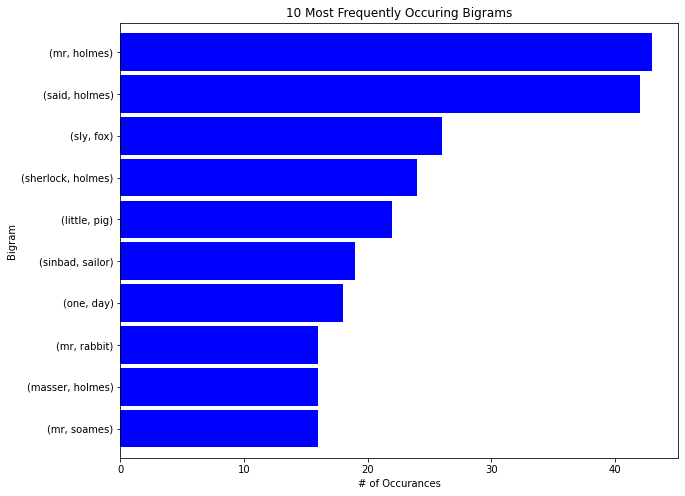

In [40]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

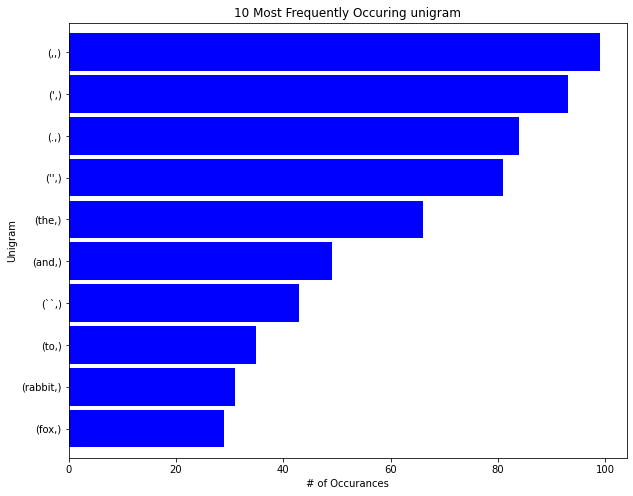

In [135]:
unigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 8))
plt.title('10 Most Frequently Occuring unigram')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [95]:
df.head()

,fileName,Text
0,\13chil,[ FOR CHILDREN:...
1,\3gables,[:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
2,\3lpigs,"[ THE THREE LITTLE PIGS, , ..."
3,\3student,[:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:...
4,\3wishes,"[ THE THREE WISHES, , O..."


# 4) You have to implement TF-IDF the Algorithm from scratch.   ( 4 Mark )

In [102]:
def convert_lower_case(data):
    return np.char.lower(data)
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [103]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [106]:
processed_text = []
for i in range(len(df)):
    processed_text.append(word_tokenize(str(preprocess(df['Text'][i]))))
    

In [125]:
DF = {}

for i in range(N):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])

In [118]:
total_vocab_size = len(DF)

In [120]:
total_vocab = [x for x in DF]

In [121]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [129]:
doc = 0

tf_idf = {}

for i in range(N):
    
    tokens = processed_text[i]
    
    counter = Counter(tokens)
    words_count = len(tokens)
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1

In [131]:
D = np.zeros((N, total_vocab_size))
for i in tf_idf:
    try:
        ind = total_vocab.index(i[1])
        D[i[0]][ind] = tf_idf[i]
    except:
        pass

In [133]:
tf_idf

{(0, "'air"): 0.0021204254073704794,
 (0, "'alarm"): 0.0021204254073704794,
 (0, "'allow"): 0.0021204254073704794,
 (0, "'and"): 0.0010788257798458852,
 (0, "'at"): 0.0006378656813404578,
 (0, "'been"): 0.0016405850427454326,
 (0, "'befor"): 0.001300132885997763,
 (0, "'brook"): 0.0021204254073704794,
 (0, "'but"): 0.0004798403646250466,
 (0, "'dainti"): 0.0021204254073704794,
 (0, "'dart"): 0.0016405850427454326,
 (0, "'delight"): 0.0021204254073704794,
 (0, "'did"): 0.0008202925213727163,
 (0, "'dinner"): 0.0021204254073704794,
 (0, "'enjoy"): 0.0021204254073704794,
 (0, "'famili"): 0.0016405850427454326,
 (0, "'foolish"): 0.0021204254073704794,
 (0, "'for"): 0.0003404521567476696,
 (0, "'fox"): 0.0021204254073704794,
 (0, "'go"): 0.001300132885997763,
 (0, "'goodi"): 0.0021204254073704794,
 (0, "'ground"): 0.0010360576773418932,
 (0, "'he"): 0.0004798403646250466,
 (0, "'hedgehog"): 0.004240850814740959,
 (0, "'hi"): 0.00043153031193835406,
 (0, "'himself"): 0.0016405850427454326,
 

# 5) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the preprocessed data for unigrams and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)

In [140]:
dict(sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)[:10])

{(4, 'woodcutt'): 0.06980881048940474,
 (0, 'rabbit'): 0.06785361303585534,
 (2, 'pig'): 0.0665012055149763,
 (0, 'fox'): 0.06149233681374389,
 (5, 'fleric'): 0.052595679135852884,
 (0, 'sli'): 0.04265521111138125,
 (4, 'sausag'): 0.04188528629364285,
 (9, 'raiko'): 0.04150794137207849,
 (9, 'samurai'): 0.04150794137207849,
 (9, 'robber'): 0.034589951143398745}

# Perform Part of Speech Tagging using the Viterbi Algorithm, 

In [151]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# 6) Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )   ( 2 Mark )

In [152]:

 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
tagged = nltk.pos_tag(words)
 
print(tagged)

[('[', 'NN'), ("'", "''"), ('for', 'IN'), ('children', 'NNS'), (':', ':'), ("'", "''"), ('``', '``'), ("'", 'POS'), ('sly', 'RB'), ('fox', 'VBP'), ("'", "''"), ('``', '``'), ("'", 'POS'), ('mr.', 'JJ'), ('rabbit', 'NN'), ('sat', 'VBD'), ('on', 'IN'), ('his', 'PRP$'), ('front', 'NN'), ('porch', 'NN'), ('rocking', 'NN'), (',', ','), ('eating', 'VBG'), ('a', 'DT'), ('great', 'JJ'), ('big', 'JJ'), ('carrot', 'NN'), (',', ','), ("'", "''"), ("'and", 'CD'), ('looking', 'VBG'), ('.', '.'), ("'", "''"), ("''", "''"), ("'", 'POS'), ('``', '``'), ('looks', 'NNS'), ('like', 'IN'), ('sly', 'RB'), ('fox', 'JJ'), ('coming', 'VBG'), ('down', 'RP'), ('the', 'DT'), ('road', 'NN'), (',', ','), ("''", "''"), ('he', 'PRP'), ('said', 'VBD'), ('to', 'TO'), ('himself', 'PRP'), (',', ','), ("walking'", 'VBZ'), ("'to", "''"), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('the', 'DT'), ('porch', 'NN'), ('.', '.'), ('shading', 'VBG'), ('his', 'PRP$'), ('eyes', 'NNS'), ('with', 'IN'), ('his', 'PRP$'), ('paws', 'NN

# 7) Split the Train and the Test Dataset  

In [202]:
train_tagged_words,test_tagged_words =train_test_split(tagged,train_size=0.80,test_size=0.20,random_state = 101)

# 8) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging. 

In [203]:

# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [204]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

# 9) Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

In [205]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[0.05813954 0.         0.         ... 0.01162791 0.01162791 0.10465116]
 [0.         0.         0.         ... 0.         0.         0.08333334]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.08333334 0.        ]
 [0.         0.         0.         ... 0.         0.         0.05882353]
 [0.04       0.01333333 0.         ... 0.01333333 0.         0.02666667]]


In [206]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,DT,WRB,FW,PRP,UH,CC,IN,PDT,NNS,PRP$,...,WP,'',POS,TO,CD,VBP,RB,MD,VBZ,","
DT,0.058140,0.000000,0.000000,0.104651,0.000000,0.011628,0.139535,0.000000,0.034884,0.000000,...,0.0000,0.046512,0.046512,0.011628,0.011628,0.000000,0.058140,0.011628,0.011628,0.104651
WRB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.083333
FW,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRP,0.069444,0.000000,0.000000,0.027778,0.000000,0.041667,0.097222,0.000000,0.000000,0.027778,...,0.0000,0.055556,0.055556,0.041667,0.027778,0.013889,0.027778,0.000000,0.013889,0.041667
UH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
CC,0.000000,0.000000,0.000000,0.023256,0.000000,0.046512,0.116279,0.000000,0.069767,0.023256,...,0.0000,0.093023,0.046512,0.000000,0.023256,0.023256,0.093023,0.000000,0.000000,0.069767
IN,0.035398,0.017699,0.000000,0.044248,0.000000,0.026549,0.070796,0.000000,0.026549,0.026549,...,0.0000,0.070796,0.061947,0.000000,0.000000,0.017699,0.070796,0.008850,0.017699,0.026549
PDT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NNS,0.018519,0.000000,0.000000,0.037037,0.000000,0.018519,0.092593,0.000000,0.055556,0.018519,...,0.0000,0.129630,0.000000,0.000000,0.000000,0.037037,0.055556,0.000000,0.018519,0.074074
PRP$,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,...,0.0000,0.090909,0.030303,0.030303,0.000000,0.000000,0.060606,0.000000,0.060606,0.000000


In [220]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [227]:
#Here We will only test 10 sentences to check the accuracy
#as testing the whole training set takes huge amount of time
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_tagged_words) if i == j] 
 
accuracy = len(check)/len(tagged_seq)


Time taken in seconds:  0.614518404006958


# Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) 

10) Using the LDA algorithm create the Topics (10) for the Corpus             (3 Marks)

11) List down the 10 words in each of the Topics Extracted.    

In [237]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tagged)
# Create Corpus
texts = tagged
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgovind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.075*"DT" + 0.072*"\'\'" + 0.066*"the" + 0.054*"VBD" + 0.042*"CC" + '
  '0.039*"VBG" + 0.036*"``" + 0.036*"and" + 0.033*"." + 0.028*"JJ"'),
 (1,
  '0.209*"IN" + 0.077*"PRP" + 0.045*"\'\'" + 0.034*"of" + 0.028*"``" + '
  '0.028*"in" + 0.028*"he" + 0.026*"DT" + 0.024*"VB" + 0.023*"PRP$"'),
 (2,
  '0.132*"\'\'" + 0.089*"RB" + 0.043*"RP" + 0.034*"PRP" + 0.026*"\'" + '
  '0.022*"so" + 0.017*"NN" + 0.017*"VBD" + 0.017*"VBP" + 0.017*"VBN"'),
 (3,
  '0.077*"RB" + 0.053*"NNS" + 0.051*"JJ" + 0.045*"." + 0.045*"sly" + '
  '0.039*"VBD" + 0.023*"NN" + 0.023*"PRP" + 0.019*"IN" + 0.019*"?"'),
 (4,
  '0.139*"NN" + 0.089*"``" + 0.069*"RB" + 0.062*"\'\'" + 0.032*"DT" + '
  '0.018*"VBD" + 0.018*"to" + 0.018*"VB" + 0.018*"a" + 0.018*"TO"'),
 (5,
  '0.151*"," + 0.128*"NN" + 0.040*"JJ" + 0.034*"rabbit" + 0.029*"DT" + '
  '0.028*"and" + 0.028*"CC" + 0.026*"TO" + 0.026*"to" + 0.024*"PRP$"'),
 (6,
  '0.151*"NN" + 0.065*"DT" + 0.059*"NNS" + 0.043*"the" + 0.023*"," + '
  '0.023*"JJ" + 0.020*"PRP" + 0.01

In [254]:

import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/sgovind/OneDrive - Intel Corporation/Desktop/Personal/bits pilani/Text mining/Mini projet 1'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/sgovind/OneDrive - Intel Corporation/Desktop/Personal/bits pilani/Text mining/Mini projet 1'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.181672  0.007412       1        1  12.241261
1      0.193842  0.193173       2        1  12.120793
7      0.015524 -0.114586       3        1  11.174031
9      0.062578  0.008458       4        1  10.141975
2      0.094159 -0.125717       5        1   9.764490
5     -0.179441  0.089333       6        1   9.658645
4     -0.008285 -0.035552       7        1   9.638506
0      0.013151  0.062564       8        1   9.248735
6     -0.078016  0.015729       9        1   8.603929
3      0.068160 -0.100814      10        1   7.407635, topic_info=    Term        Freq       Total Category  logprob  loglift
26     ,  150.000000  150.000000  Default  30.0000  30.0000
37     .  139.000000  139.000000  Default  29.0000  29.0000
4     IN  121.000000  121.000000  Default  28.0000  28.0000
11    RB   99.000000   99.000000  Default  27.0000  27.0000
0     NN  234.000000  234.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
2      '    2.773236   80.144485  Topic10  -4.6153  -0.7612
41    RP    1.878211   19.195852  Topic10  -5.0050   0.2783
3     ''    2.775593  203.246884  Topic10  -4.6145  -1.6909
21  PRP$    1.878660   32.685324  Topic10  -5.0048  -0.2537
79   VBN    1.878377   29.388088  Topic10  -5.0049  -0.1475

[595 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
303       2  0.062130     !
303       3  0.186389     !
303       4  0.310648     !
303       6  0.124259     !
303       7  0.062130     !
...     ...       ...   ...
81        2  0.319246   you
81        3  0.319246   you
81        5  0.212831   you
81       10  0.106415   you
126       9  0.546928  your

[756 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 8, 10, 3, 6, 5, 1, 7, 4])